Epoch 1/20


c:\Users\shaon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0093
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.8202e-04
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.2338e-04
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.7689e-04
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9367e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.4703e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5865e-04
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.3258e-04
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.6389e-04
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.2202e-04
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0150e-04
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9200e-04
Epoch 13/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.6580e-04
Epoch 14/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.7593e-04
Epoch 15/20
36/36 ━━━━━━━━━━━━

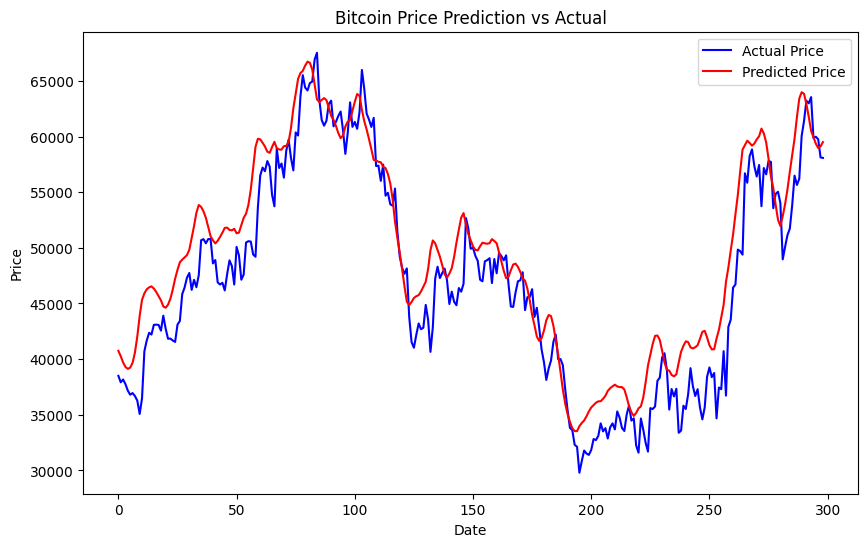

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Bitcoin Historical Data - Investing.com India.csv', encoding='unicode_escape')

# Clean and prepare the dataset
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%y')
df.sort_values('DATE', inplace=True)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Prepare the data
data = df['Price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into training and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

# Prepare training data
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=25),
    tf.keras.layers.Dense(units=1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Prepare test data
X_test = []
y_test = data[train_size:]  # actual values for comparison
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(10,6))
plt.plot(df.index[train_size:], y_test, color='blue', label='Actual Price')
plt.plot(df.index[train_size:], predictions, color='red', label='Predicted Price')
plt.title('Bitcoin Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [3]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3599.591789799244


In [4]:
# Build a GRU model with Dropout
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=50, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=25),
    tf.keras.layers.Dense(units=1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=100)  # You can increase epochs for better training


Epoch 1/100


c:\Users\shaon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0280
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0013
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.7769e-04
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.5496e-04
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.9777e-04
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.1716e-04
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.4337e-04
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.0133e-04
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.7416e-04
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.2796e-04
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.9271e-04
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9.9356e-04
Epoch 15/100
36/36 ━━━━━━━━━━

LSTM with dropout and GRU

Epoch 1/100


C:\Users\shaon\AppData\Local\Temp\ipykernel_17608\2861077351.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])
c:\Users\shaon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0740 - val_loss: 1.5262e-04
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0033 - val_loss: 1.4478e-04
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026 - val_loss: 1.0245e-04
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0021 - val_loss: 1.0056e-04
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0017 - val_loss: 2.3753e-04
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0019 - val_loss: 1.1363e-04
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022 - val_loss: 1.5627e-04
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022 - val_loss: 9.8192e-05
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0014 - val_loss: 1.1634e-04
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0019 - val_loss: 9.2182e-05
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0019 - val_loss: 1.2781e-04
Epoch 12/100
36/36 ━

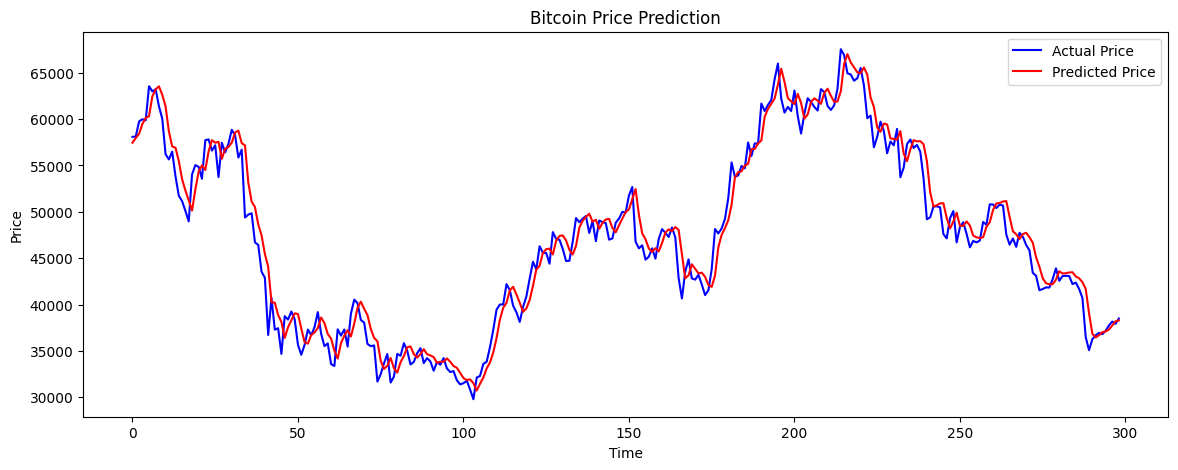

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Bitcoin dataset
df = pd.read_csv('Bitcoin Historical Data - Investing.com India.csv', encoding='unicode_escape')

# Convert Date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Feature selection
df['Price'] = df['Price'].str.replace(',', '').astype(float)
data = df['Price'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build a GRU model with Dropout
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=50, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=25),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Split the data into training and validation sets
train_size = int(len(X_train) * 0.8)
X_train_set, X_val_set = X_train[:train_size], X_train[train_size:]
y_train_set, y_val_set = y_train[:train_size], y_train[train_size:]

# Train the model with early stopping
history = model.fit(X_train_set, y_train_set, 
                    validation_data=(X_val_set, y_val_set),
                    batch_size=32, epochs=100, callbacks=[early_stopping])

# Prepare test data (using the last 60 days of training data + test data)
# Assuming you already have test data preparation code here...

# Predict the prices
predictions = model.predict(X_test)  # Assuming X_test has been prepared correctly
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Assuming y_test has been defined
print(f"RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
threshold = 0.05  # Define a threshold, e.g., 5% of actual values
accuracy_count = np.sum(np.abs(predictions - y_test) / y_test <= threshold)
accuracy = accuracy_count / len(y_test) * 100
print(f"Percentage Accuracy (within {threshold*100}%): {accuracy:.2f}%")

Percentage Accuracy (within 5.0%): 77.26%


In [7]:
from sklearn.model_selection import train_test_split

# Assuming you've already prepared your data as before...
# Train-test split with a time-series perspective
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build a more complex GRU model
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=50, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=25),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, epochs=200, 
                    callbacks=[early_stopping])

# Evaluate the model again
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
accuracy = np.mean(np.abs(predictions - y_test.flatten()) / y_test.flatten()) * 100

print(f"RMSE: {rmse}, MAE: {mae}, Percentage Accuracy: {accuracy:.2f}%")



NameError: name 'X' is not defined

Epoch 1/200


C:\Users\shaon\AppData\Local\Temp\ipykernel_17608\3560630056.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])
c:\Users\shaon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0396 - val_loss: 3.8008e-04
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0028 - val_loss: 1.3493e-04
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0026 - val_loss: 1.1897e-04
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0024 - val_loss: 1.8605e-04
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0030 - val_loss: 9.8840e-04
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0033 - val_loss: 1.1954e-04
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0025 - val_loss: 1.1916e-04
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0018 - val_loss: 1.0528e-04
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0019 - val_loss: 9.5285e-05
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0018 - val_loss: 9.0319e-05
Epoch 11/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0016 - val_loss: 9.5161e-05
Epoch 12/200
36/36 ━

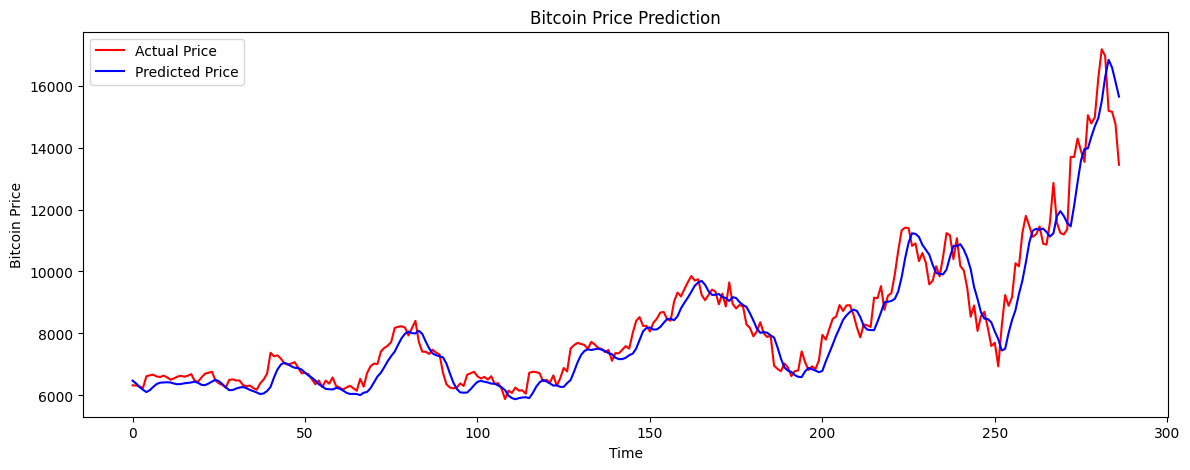

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Bitcoin Historical Data - Investing.com India.csv', encoding='unicode_escape')

# Convert Date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Feature selection
df['Price'] = df['Price'].str.replace(',', '').astype(float)
data = df['Price'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
X, y = [], []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train-test split (keep the sequence)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build a more complex GRU model
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=50, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=25),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, epochs=200, 
                    callbacks=[early_stopping])

# Predicting the prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_test.reshape(-1, 1))))
mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
accuracy = np.mean(np.abs(predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) / scaler.inverse_transform(y_test.reshape(-1, 1))) * 100

# Print metrics
print(f"RMSE: {rmse}, MAE: {mae}, Percentage Accuracy: {accuracy:.2f}%")

# Plotting predicted vs actual values
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


Linear Regression model

RMSE: 426.04068505130914, MAE: 286.359991850334, R2 Score (Accuracy): 96.15066837647952%


C:\Users\shaon\AppData\Local\Temp\ipykernel_17608\1633900890.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


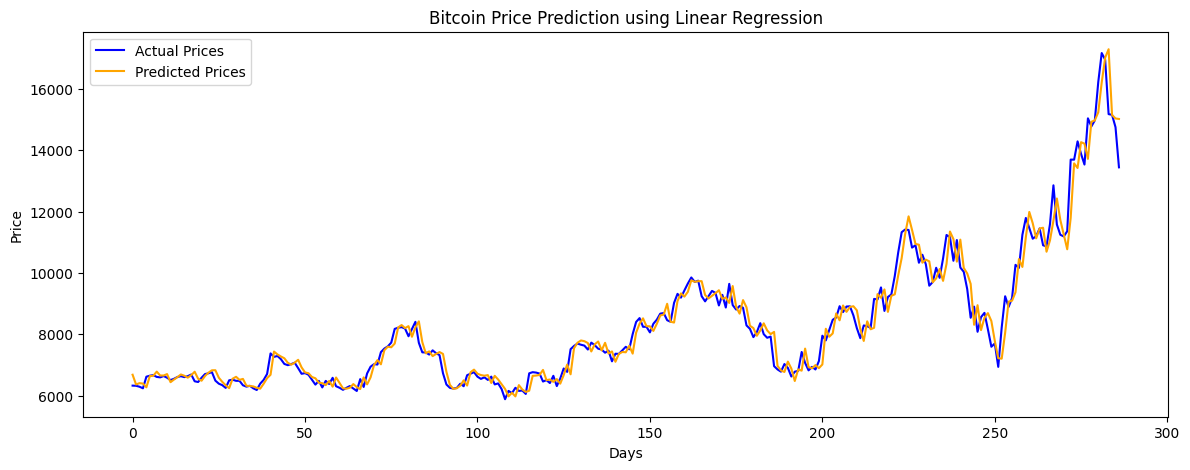

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('Bitcoin Historical Data - Investing.com India.csv', encoding='unicode_escape')

# Convert Date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Feature selection
df['Price'] = df['Price'].str.replace(',', '').astype(float)
data = df['Price'].values  # Use 'Price' for prediction
data = data.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
X, y = [], []
timesteps = 60

for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i-timesteps:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape X for Linear Regression (samples, features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)
accuracy = r2_score(y_test_actual, predictions) * 100  # Percentage accuracy

# Print performance metrics
print(f"RMSE: {rmse}, MAE: {mae}, R2 Score (Accuracy): {accuracy}%")

# Plot the predicted vs actual values
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange')
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
